# Parameter Mutation/Migration
## Setup

In [1]:
from coders import Parameter
import scipy.stats
colors = ['red', 'lime', 'blue', 'orange', 'magenta', 'darkkhaki']

## Individual Mutation
### Theoretical

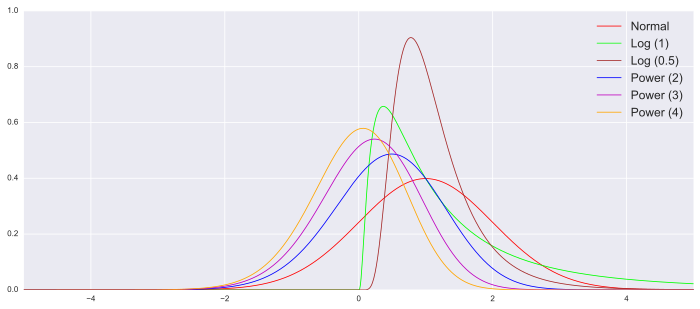

In [2]:
ys = np.linspace(-5, 5, 1000)
sns.tsplot(scipy.stats.norm.pdf(ys, loc=1), condition='Normal', time=ys, color='r')
sns.tsplot(scipy.stats.lognorm.pdf(ys, loc=np.log(1), s=1), condition='Log (1)', time=ys, color='lime')
sns.tsplot(scipy.stats.lognorm.pdf(ys, loc=np.log(1), s=0.5), condition='Log (0.5)', time=ys, color='brown')
sns.tsplot(scipy.stats.powernorm.pdf(ys, loc=1, c=2), condition='Power (2)', time=ys, color='b')
sns.tsplot(scipy.stats.powernorm.pdf(ys, loc=1, c=3), condition='Power (3)', time=ys, color='m')
sns.tsplot(scipy.stats.powernorm.pdf(ys, loc=1, c=4), condition='Power (4)', time=ys, color='orange')
plt.legend(prop={'size': 12})
plt.savefig('out/param_mutation.pdf', bbox_inches='tight', pad_inches=0)

### Setup

In [11]:
def individual(params_1, runs_1=100000, runs_2=100):
    id_ = id(params_1)
    print(id_)
    vals_1 = np.array([[p.mutate().current for p in params_1] for _ in range(runs_1)])
    for vals, c, p in zip(vals_1.T, colors, params_1):
        fig = sns.kdeplot(vals, bw=0.5, color=c, label=repr(p), legend=True)
    axes = fig.axes
    axes.set_xlim([0, 1000])
    plt.legend(prop={'size': 12})
    plt.savefig('out/param_distribution_{}.pdf'.format(id_), bbox_inches='tight', pad_inches=0)
    plt.show()
    vals_2 = [[p.current for p in params_1]]
    params_1b = [p.mutate() for p in params_1]
    for n in range(runs_2):
        vals_2.append([p.current for p in params_1b])
        params_1b = [p.mutate() for p in params_1b]
    for v, c, p in zip(np.array(vals_2).T, colors, params_1):
        sns.tsplot(v, color=c, condition=repr(p), legend=True)
    plt.legend(prop={'size': 12})
    plt.savefig('out/param_evolution_{}.pdf'.format(id_), bbox_inches='tight', pad_inches=0)
    plt.show()
    for v, c, p in zip(np.array(vals_2).T, colors, params_1):
        if p.log:
            sns.tsplot(np.log(v), color=c, condition=repr(p), legend=True)
    plt.legend(prop={'size': 12})
    plt.savefig('out/param_evologution_{}.pdf'.format(id_), bbox_inches='tight', pad_inches=0)
    plt.show()
    return vals_1, vals_2

### Normal

1568179806424


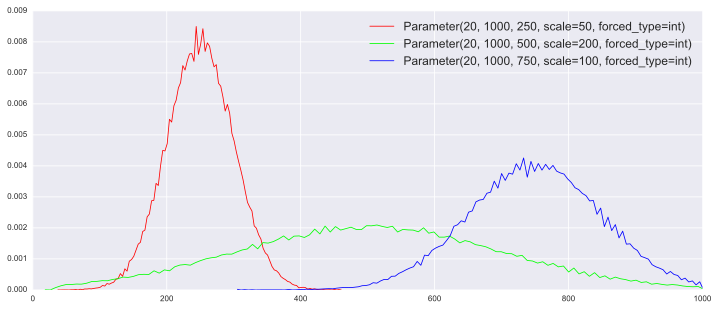

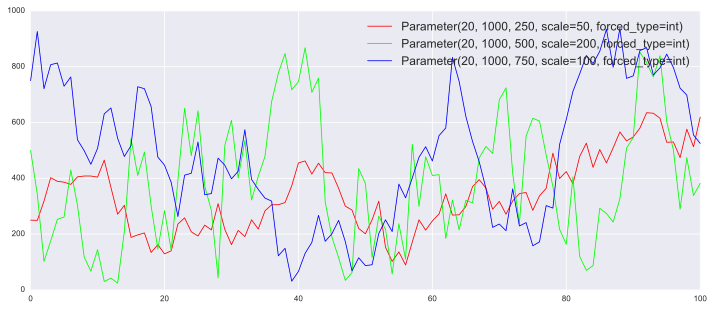

C:\Python\3.5.1\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


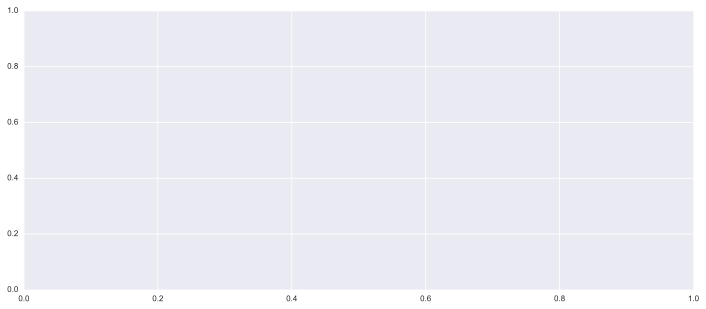

In [12]:
params_1a = (Parameter(20, 1000, 250, scale=50),
             Parameter(20, 1000, 500, scale=200),
             Parameter(20, 1000, 750, scale=100))

vals_1a, vals_1b = individual(params_1a)

### Log

1568196773136


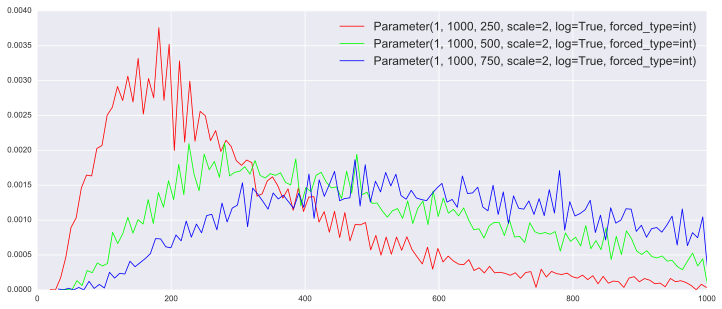

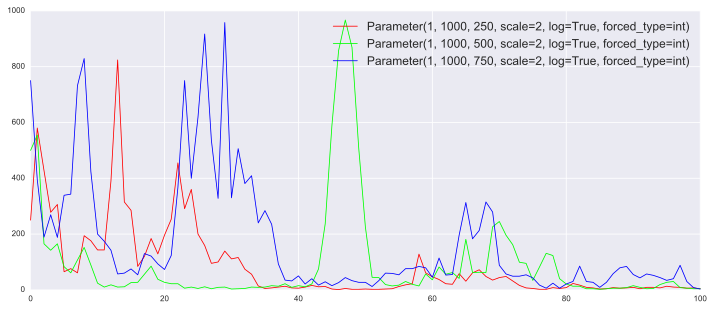

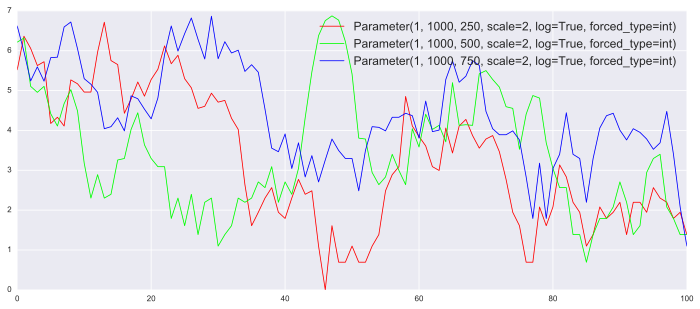

In [13]:
r1x, r1y, s1 = 1, 1000, 2
params_1b = (Parameter(r1x, r1y, r1y*1//4, scale=s1, log=True),
             Parameter(r1x, r1y, r1y*2//4, scale=s1, log=True),
             Parameter(r1x, r1y, r1y*3//4, scale=s1, log=True))

vals_1c, vals_1d = individual(params_1b, 10000)

### Polynomial over Normal

1568179806496


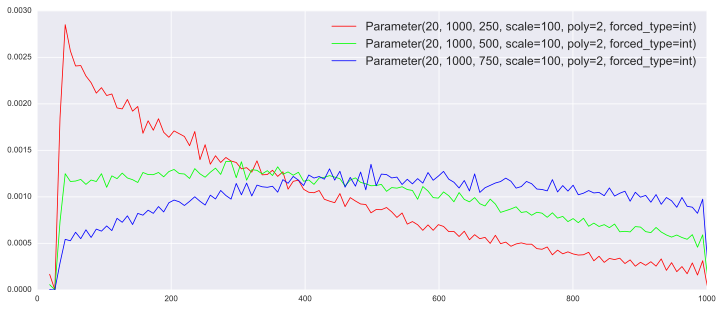

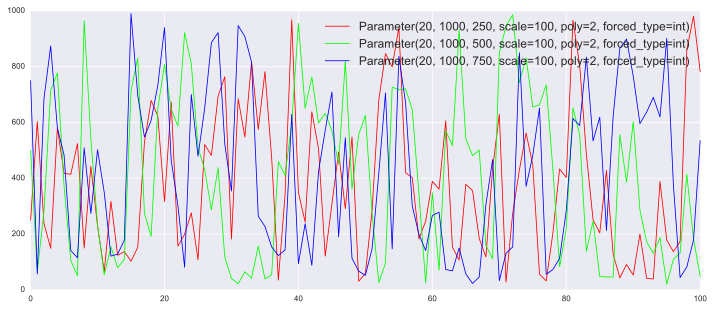

C:\Python\3.5.1\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


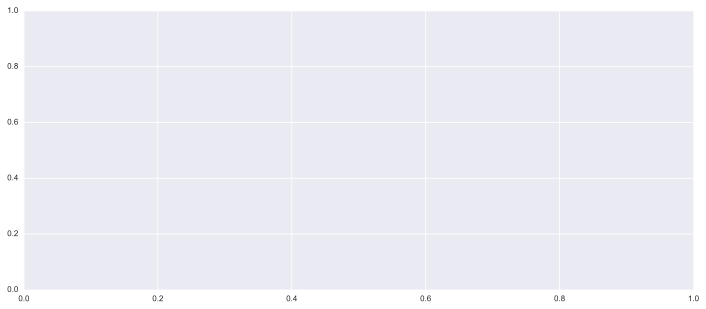

In [14]:
params_1c = (Parameter(20, 1000, 250, scale=100, poly=2),
             Parameter(20, 1000, 500, scale=100, poly=2),
             Parameter(20, 1000, 750, scale=100, poly=2))

vals_1e, vals_1f = individual(params_1c)

### Polynomial over Log

1568158675304


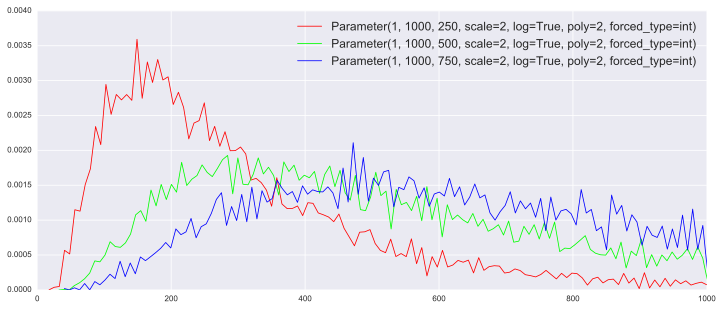

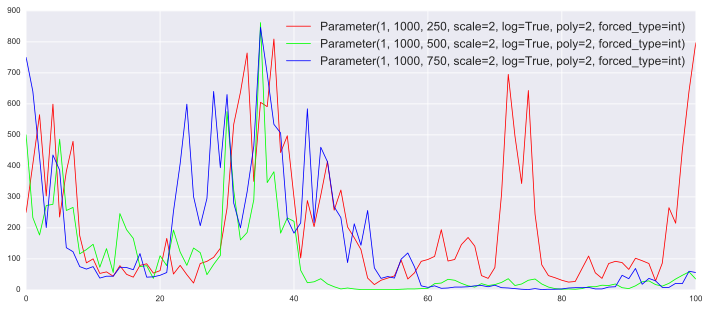

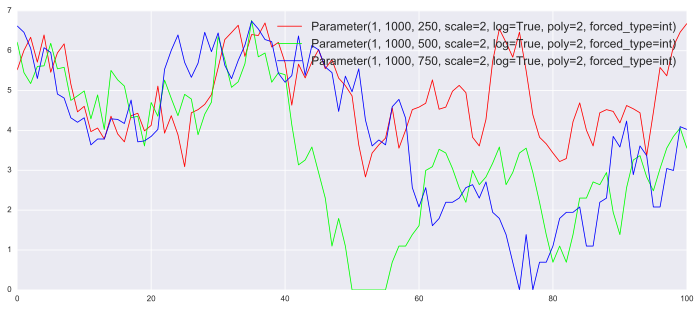

In [15]:
r2x, r2y, s2 = 1, 1000, 2
params_1b = (Parameter(r2x, r2y, r2y*1//4, scale=s2, log=True, poly=2),
             Parameter(r2x, r2y, r2y*2//4, scale=s2, log=True, poly=2),
             Parameter(r2x, r2y, r2y*3//4, scale=s2, log=True, poly=2))

vals_1g, vals_1h = individual(params_1b, 10000)

## Pair Mutation

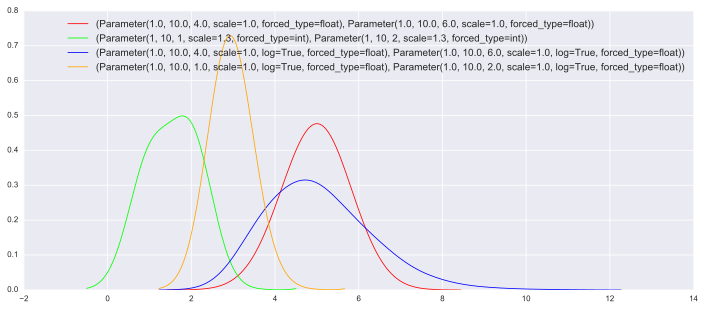

In [16]:
params_2 = (
            (Parameter(1.0, 10.0, 4.0, scale=1.0), Parameter(1.0, 10.0, 6.0, scale=1.0)),
            (Parameter(1, 10, 1, scale=1.3), Parameter(1, 10, 2, scale=1.3)),
            (Parameter(1.0, 10.0, 4.0, scale=1.0, log=True), Parameter(1.0, 10.0, 6.0, scale=1.0, log=True)),
            (Parameter(1.0, 10.0, 1.0, scale=1.0, log=True), Parameter(1.0, 10.0, 2.0, scale=1.0, log=True))
           )
vals2 = np.array([[p1.cross(p2).current for p1, p2 in params_2] for n in range(1000)])

for vals, c, p in zip(vals2.T, colors, params_2):
    sns.kdeplot(vals, bw=0.5, color=c, label=repr(p), legend=True)
plt.legend(prop={'size': 10})
plt.savefig('out/param_cross.pdf', bbox_inches='tight', pad_inches=0)
plt.show()